<a href="https://colab.research.google.com/github/bengcheo/natural-language-processing/blob/master/Topic_Modelling_on_Job_Adverts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

I just received the dataset. But I have no idea what I want to do it. So I have decided to have a glimpse of the data which I received

## Step 0: Formulating a Business Problem

Here, I have decided to look at the dataset and think what kind of business problem I would like to solve. I will look at the raw dataset and try to get an idea.

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

df= pd.read_excel('/content/drive/My Drive/test_data.xlsx')
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,job_id,job_title,job_description,date_posted,company_name
0,dc4c44bf442f4baa57f22233fee9195b75d62baa3b0265...,BUSINESS DEVELOPMENT (FREIGHT FORWARDING),- Roles &amp; Responsibilities : Job Role Desc...,2020-11-27,CALL LADE ENTERPRISES PTE LTD
1,39fc119781f2337a52de7300f21b76cda9b2c0202bfec9...,Secretary/PA,- Roles &amp; Responsibilities : Job Scope:<br...,2020-11-26,TALENT TRADER GROUP PTE. LTD.
2,2bdd91d7794575aaefee738ef6c831f7129fe6172f713c...,Temporary 3-6months Admin Assistant (Office ho...,Monday to Friday Office hoursLocation : Buona ...,2020-11-14,Confidential
3,0c170932727e0246f27feb1a5641d0e26f44d26d431be6...,Program Management,- Roles &amp; Responsibilities : Key Responsib...,2020-11-09,YASH TECHNOLOGIES SINGAPORE PTE. LIMITED
4,458658ef725f6384d4c056f6a8b01747331ba7c3c5c2e5...,Automotive Software Engineers (C Programming /...,&bull; MNC&bull; $3500 - $6000 Basic + AWS + V...,2020-11-15,Confidential
5,d9e850991db70064d3cfd30ca5d5153e37f383535999bf...,Managing Consultant,- Roles &amp; Responsibilities : PRIMARY OBJEC...,2020-11-06,MICHAEL PAGE INTERNATIONAL PTE LTD
6,e29e488f5140be0f4e3c781a4661d99765639b1ccbf017...,Lab Technician - $1700 #ERH,Local Food Manufacturing company is hiring for...,2020-11-24,RecruitExpress
7,16b11b58c6b8c601396167af05b7a068670ce6b48c5a93...,Senior Software Engineer,- Roles &amp; Responsibilities : OpenBet (now ...,2020-11-20,OPENBET SINGAPORE PTE. LIMITED
8,0e2237ae429ed3e93cebe3a77be1ee71b45400b7259c65...,QA / QC MANAGER (Construction) (Dredging) (2 y...,MNC<br/>2 years contract<br/>Good benefits<br/...,2020-11-27,Confidential
9,58c0f1e62ffd124266959f5d2749bb3b18c1c3edc4d145...,"Executive/Senior Executive, Graduate Studies (...",- Roles &amp; Responsibilities : To assist in ...,2020-11-18,NATIONAL UNIVERSITY OF SINGAPORE


In [ ]:
df.tail(10)

,job_id,job_title,job_description,date_posted,company_name
2990,0a6819185453623254c69790dadc51046f7c96a4c86809...,Storekeeper - UEMS Solutions Pte Ltd,"Storekeeper &ndash; Service Industry, Based in...",2020-11-08,Confidential
2991,241196a080f0b41b386b7bb08be2b666e449662b16acdd...,Sr. Java Developer,We are looking for Sr. Java Developer with mic...,2020-11-26,Helius Technologies Pte Ltd
2992,6d9b2fcfb931cbfbaf265ee69c9efe25a07a0ea36a95db...,Data Science Engineer- Smart Mfg & AI - MICRON...,As a Data Science Engineer at Micron Technolog...,2020-11-21,Confidential
2993,cac05d6fc8835716c9bbc0d3b9fcf358eccfc0a7f38676...,Service Crew,- Roles &amp; Responsibilities : Roles and Res...,2020-11-23,SUBCITIS ENTERPRISE PTE. LTD.
2994,658be7f03b6d8657ec39c9f2e756089bee1c3ff3c928ac...,Software Engineer (Backend) #SGUnitedTraineeships,- Roles &amp; Responsibilities : This position...,2020-11-06,RAZER (ASIA-PACIFIC) PTE. LTD.
2995,75e2b63e778ccc4d56b125befda1a63478633c1894f059...,Office Manager - In Mind Cloud Pte Ltd,"About In Mind Cloud:<br/><br/>We, In Mind Clou...",2020-11-14,Confidential
2996,9c310ff5334fa90f019e6f2036e52655af1b3649049373...,Marketing/ Business Development,This position offers great potential for growt...,2020-11-15,Confidential
2997,42c80d1f2968fc9146d64e07f1fb2719b78fb045b0ede0...,Enrolled Nurse / Staff Nurse (Various Discipli...,Benefit summary:<br/><br/>Salary up to $4500 +...,2020-11-14,Confidential
2998,f15906ff6926edd4f8f3f057bbc673106f087ef28ed400...,Store Manager - Up to $5200 (5 days / Japanese...,"As a Store Manager, you are responsible for ma...",2020-11-26,Confidential
2999,f2bf34666de9bde3a0e16222272345797f51bfcfb6ef7a...,Sales Account Executive (IT Solutions),- Roles &amp; Responsibilities : Your Role and...,2020-11-19,ASIACLOUD SOLUTIONS PRIVATE LIMITED


### Looking at job description

I decided to look at the job descriptions to understand what I have to clean from the string

In [ ]:
print(df['job_title'][df.shape[0]-1])
df['job_description'][df.shape[0]-1]

Sales Account Executive (IT Solutions)


'- Roles &amp; Responsibilities : Your Role and Responsibilities<br/>&Oslash; To understand existing and new customers&rsquo; needs and propose a suitable proposal for them.<br/>&Oslash; Build a good rapport with existing customers to retain them and develop new opportunities actively.<br/>&Oslash; To engage more often with customers by conducting calls and plan to meet up with them.<br/>&Oslash; To have a clear and deep understanding of the company&rsquo;s product and services in order to negotiate professionally and successfully to close a sale<br/>&Oslash; Negotiation with business partners for purchases and work with the Operations Team<br/>for project deployment.<br/>&Oslash; Manage, propose sales quotation and proposal.<br/>&Oslash; To keep track of customers&rsquo; accounts and ensure of payments is made promptly.<br/>&Oslash; To provide after sales service when necessary.<br/>&Oslash; Create sales strategies to achieve the sales quota.<br/>&Oslash; To build a sales pipeline and

In [ ]:
print(df['job_title'][2])
print(df['job_description'][2])

Temporary 3-6months Admin Assistant (Office hours) - JOBSTUDIO PTE LTD
Monday to Friday Office hoursLocation : Buona vista/Novena/Outram&nbsp;<br/>Job description:<br/>Assist in business processes&nbsp;Data entry into the system&nbsp;<br/>Coordinating and scheduling of meeting&nbsp;<br/>General administrative duties&nbsp;&nbsp;<br/>Requirement:Candidate must possess at least a Diploma or GCE A Level&nbsp;Proficient in Excel&nbsp;<br/>No experience welcome&nbsp;<br/>Interested applicants, kindly furnish us with your detailed resume in MS Words format and click &quot;Apply Now&quot; button.<br/>** We regret to inform only shortlisted candidates will be notified. Applicants who do not possess necessary experience or qualification will still be considered on individual merits and may be contacted for other opportunities.**<br/>JOBSTUDIO PTE LTDEA License No: 10C4754EA Personnel: Von LooiEA Personnel Reg No: R1660254


In [ ]:
print(df['job_title'][21])
df['job_description'][21]

Retail Allocator


'- Roles &amp; Responsibilities : Under Armour has one mission: to make you better. The Brand was created on a football field in 1996 when University of Maryland special teams captain Kevin Plank looked down at his heavy, sweaty cotton T-shirt and thought: there has got to be something better. So, he made a T-shirt that keeps you cool, light, and dry, so you can push yourself further. And it changed the way athletes dress forever.<br/><br/>Today, UA makes a lot more than performance T-shirts&mdash;shoes that make you faster, gear that takes on the elements, digital tools to help you get healthier&mdash;but that commitment to innovation still lies at the heart of everything UA does. With offices all across the globe, the Brand is committed to inspiring athletes with performance solutions they never knew they needed and can&rsquo;t imagine living without.<br/><br/>Job Duties &amp; Responsibilities:<br/>&bull; Responsible for the allocation of stocks in owned retail stores to ensure an op

In [ ]:
df['date_posted'].unique()

array(['2020-11-27T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2020-11-14T00:00:00.000000000', '2020-11-09T00:00:00.000000000',
       '2020-11-15T00:00:00.000000000', '2020-11-06T00:00:00.000000000',
       '2020-11-24T00:00:00.000000000', '2020-11-20T00:00:00.000000000',
       '2020-11-18T00:00:00.000000000', '2020-11-25T00:00:00.000000000',
       '2020-11-08T00:00:00.000000000', '2020-11-17T00:00:00.000000000',
       '2020-11-22T00:00:00.000000000', '2020-11-10T00:00:00.000000000',
       '2020-11-19T00:00:00.000000000', '2020-11-13T00:00:00.000000000',
       '2020-11-12T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-11-03T00:00:00.000000000', '2020-11-05T00:00:00.000000000',
       '2020-11-11T00:00:00.000000000', '2020-11-23T00:00:00.000000000',
       '2020-11-21T00:00:00.000000000', '2020-11-04T00:00:00.000000000',
       '2020-11-02T00:00:00.000000000', '2020-12-02T00:00:00.000000000',
       '2020-12-14T00:00:00.000000000', '2020-12-18

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_id           3000 non-null   object        
 1   job_title        3000 non-null   object        
 2   job_description  3000 non-null   object        
 3   date_posted      3000 non-null   datetime64[ns]
 4   company_name     3000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 117.3+ KB


## Observations



1.   Job Description column contains many HTML tags that have to be cleaned before a proper NLP. There are also many special characters that companies and recruiters used to embellish their advertisements.
2.   Job Title column is way too messy, and there is no standardized manner in presenting job title (for e.g., Data Engineer, Researcher etc) but the way the job titles have been presented is way too messy.  Too many special characters and embellishments.
3.   Data only contains November and December job postings in 2020. No missing fields observed.



# Step 1: Formulating a research question to solve business problem

The question that I have is that is there a better way to assign tags to the job description. This will help people who use the system to search for appropriate jobs easily.

**Business Problem:** Dataset is too busy. We can't identify which job title should be tagged to which job description.

**Objective:** To develop an unuspervised clustering ML model so that we can cluster job postings that are similar together, and we can manually add the most approriate job title to tag similar job postings.

**Benefits:** faster and more efficient search of similar job postings and companies using the system. This can also help us to develop a supervised classification system in the future. 

#Step 2: Data Proprocessing

In this step, I will be performing text data preprocessing.

I will be cleaning the text by removing HTML tags, punctuations, numbers and just retaining words.

In [ ]:
import string, re
from bs4 import BeautifulSoup

class data_cleaner:
  def __init__(self):
    pass
  
  def html_cleaner(self, text):
    #list_of_html_chars = ["<br>","<br/>","&nbsp", "&amp","&quot","&bull;","\t", "&rsquo", "&Oslash","&rdquo"]
    #for element in list_of_html_chars: 
    #  text = text.replace(element, " ")
    text = BeautifulSoup(text, "lxml").text
    return text

  def remove_punctuation(self, text): 
    #puncs = '''!()-[]{};:'"\,<>./@?#$%^*_~'''
    for punc in string.punctuation:
        text = text.replace(punc, '')
    return text

  def remove_whitespace(self, text):
    return " ".join(text.split())

  def remove_numbers(self, text):
    return re.sub(r'[0-9]+', '', text)

  def string_cleaner(self, text):
    text = text.apply(self.html_cleaner)
    text = text.apply(self.remove_punctuation) #remove punctuation
    text = text.apply(self.remove_whitespace) #remove whitespace
    text = text.apply(self.remove_numbers) #remove numbers
    text = text.str.lower()
    return text


In [ ]:
dc = data_cleaner() 
cleaned_description = dc.string_cleaner(df['job_description'])

In [ ]:
# First, we clean the dataset off unwanted special characters and numbers.

corpus = ' '.join(cleaned_description)
corpus_list = [ch for ch in corpus.split()]
print(corpus_list[:500])

['roles', 'responsibilities', 'job', 'role', 'description•', 'responsible', 'for', 'business', 'development', 'for', 'freight', 'forwarding•', 'identify', 'potential', 'clients', 'in', 'the', 'target', 'market', 'and', 'complete', 'appropriate', 'research', 'on', 'the', 'prospective', 'clients', 'business', 'and', 'equipment', 'needs•', 'develop', 'intervention', 'strategies', 'to', 'mitigate', 'gaps', 'in', 'delivery', 'of', 'logistics', 'services•', 'develop', 'relationships', 'with', 'potential', 'customers', 'and', 'meeting', 'sales', 'targets•', 'negotiate', 'contract', 'terms', 'with', 'clients', '•', 'actively', 'seeking', 'out', 'new', 'sales', 'opportunities', 'through', 'cold', 'calling', 'networking', 'and', 'social', 'mediarequirements•', 'proven', 'working', 'experience', 'as', 'a', 'business', 'development', 'sales', 'executive', 'or', 'a', 'relevant', 'role•', 'experience', 'in', 'customer', 'support', 'is', 'a', 'plus•', 'proficiency', 'in', 'ms', 'office', '•', 'market

In [ ]:
word_dict = {}

for word in corpus_list:
  if word not in word_dict:
    word_dict[word] = 1
  else:
    word_dict[word] += 1

sorted(word_dict.items(), key= lambda x: x[1], reverse= True)

[('and', 39797),
 ('to', 21863),
 ('the', 17200),
 ('of', 15151),
 ('in', 14712),
 ('with', 9604),
 ('for', 8398),
 ('a', 7511),
 ('or', 4503),
 ('be', 4213),
 ('as', 4118),
 ('on', 4050),
 ('will', 3820),
 ('experience', 3652),
 ('work', 3471),
 ('is', 3431),
 ('are', 2923),
 ('you', 2692),
 ('your', 2621),
 ('our', 2510),
 ('team', 2461),
 ('business', 2446),
 ('management', 2417),
 ('that', 2351),
 ('all', 2081),
 ('at', 1915),
 ('an', 1881),
 ('by', 1864),
 ('data', 1855),
 ('support', 1776),
 ('working', 1742),
 ('we', 1665),
 ('skills', 1654),
 ('ensure', 1640),
 ('other', 1632),
 ('years', 1609),
 ('job', 1547),
 ('development', 1477),
 ('project', 1426),
 ('this', 1409),
 ('responsibilities', 1338),
 ('from', 1332),
 ('no', 1321),
 ('candidates', 1312),
 ('knowledge', 1303),
 ('new', 1297),
 ('communication', 1287),
 ('good', 1249),
 ('customer', 1223),
 ('related', 1207),
 ('sales', 1179),
 ('email', 1136),
 ('service', 1135),
 ('including', 1131),
 ('relevant', 1129),
 ('plea

After counting the word frequency of the words in our corpus, I realize that there are many stopwords that need to be removed. They are likely to influence our tf-idf weights since stopwords occur so commonly, and they appear in other job postings very often as well.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

class additional_cleaner(data_cleaner):

  def stopword_remover(self, text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in text.split() if not word in stop_words])

  def word_stemmer(self, text):
    lemma = WordNetLemmatizer()
    return ' '.join([lemma.lemmatize(word) for word in text.split()])

  def retain_alpha(self, text):
    return ' '.join([word for word in text.split() if word.isalpha()])

  def string_cleaner(self, text):
    text = super(additional_cleaner, self).string_cleaner(text) #inheriting the parent class
    text = text.apply(self.stopword_remover)
    text = text.apply(self.word_stemmer)
    text = text.apply(self.retain_alpha)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# the observation is that we still have many stopwords in the description.
# also, we can lemmatize the words so that we can better aggregate words of similar roots together.
dc2 = additional_cleaner()

In [ ]:
cleaned_description2 = dc2.string_cleaner(df['job_description'])
cleaned_description2[21]

'role responsibility armour one mission make better brand created football field university maryland special team captain kevin plank looked heavy sweaty cotton tshirt thought got something better made tshirt keep cool light dry push changed way athlete dress forevertoday ua make lot performance make faster gear take element digital tool help get commitment innovation still lie heart everything ua office across globe brand committed inspiring athlete performance solution never knew needed imagine living withoutjob duty responsible allocation stock owned retail store ensure optimal inventory achieve sale profit sellthrough generate weekly pickandpack order submission planning team involving limited new product launch replenishment promotion opening stock new generate stock consolidation pack order communication operation team end report weekly inventory summary reviewing stock holding store closely retail merchandising team maximize sale inventory communicate weekly launch stock deliver

In [ ]:
word_dict = {}
corpus = ' '.join(cleaned_description2)
corpus_list = [ch for ch in corpus.split()]

for word in corpus_list:
  if word not in word_dict:
    word_dict[word] = 1
  else:
    word_dict[word] += 1

sorted(word_dict.items(), key= lambda x: x[1], reverse= True)

[('experience', 3843),
 ('work', 3722),
 ('team', 3033),
 ('business', 2542),
 ('management', 2417),
 ('service', 2174),
 ('project', 2170),
 ('customer', 2010),
 ('year', 1982),
 ('support', 1861),
 ('data', 1855),
 ('role', 1831),
 ('candidate', 1791),
 ('skill', 1748),
 ('working', 1744),
 ('system', 1663),
 ('ensure', 1640),
 ('job', 1630),
 ('communication', 1551),
 ('product', 1548),
 ('development', 1534),
 ('application', 1517),
 ('responsibility', 1445),
 ('process', 1441),
 ('good', 1327),
 ('client', 1325),
 ('knowledge', 1303),
 ('new', 1297),
 ('related', 1207),
 ('sale', 1189),
 ('email', 1176),
 ('technology', 1175),
 ('design', 1141),
 ('resume', 1132),
 ('including', 1131),
 ('relevant', 1129),
 ('please', 1128),
 ('requirement', 1114),
 ('operation', 1102),
 ('technical', 1053),
 ('company', 1047),
 ('information', 986),
 ('strong', 972),
 ('able', 961),
 ('office', 960),
 ('singapore', 951),
 ('solution', 950),
 ('quality', 942),
 ('least', 941),
 ('provide', 939),
 

The corpus now looks better with no more stopwords, numbers, as well as punctuations.

# Step 3: Attempting to build an unsupervised learning model.

Here I attempted to build an unsupervised machine-learning model.

A commonly used algorithm for building an unsupervised machine-learning model is the K-Means Clustering algorithm. A K-means algorithm may work well as it will attempt to assign labels by finding thecentroids ("center points") to clusters of data in order to cluster data together.

The objective of this is to cluster our tf-idf weights so that we are able to cluster job postings of similar nature, and we are able to assign a suitable label to it. Therefore, we should be able to build a labelling system.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

max_description_length = max(cleaned_description2.str.split().str.len())
print(max_description_length)

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=max_description_length,
                                 min_df=0.2, use_idf=True)

tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_description2) 

print(tfidf_matrix.shape)

1145
(3000, 50)


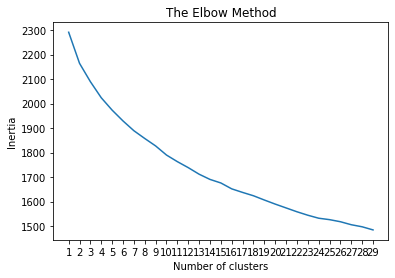

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
cs = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 69)
    kmeans.fit(tfidf_matrix)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 30), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(range(1,30))
plt.ylabel('Inertia')
plt.show()

However, by studying the elbow method, I have been unable to find the "elbow" point in which the drop in inertia becomes lesser and lesser. The "elbow" method is a commonly used method in finding the optimum number of clusters. 

In [ ]:
kmeans = KMeans(n_clusters=20,random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_
print(labels)

[16  2 15 ...  2  9 10]


In [ ]:
#printing out labels

label_length = len(set(labels))
raw_title = df['job_title']

clusters = {}
n = 0
for item in labels:
  if item in clusters:
    clusters[item].append(raw_title[n])
  else:
    clusters[item] = [raw_title[n]]
  n +=1

for item in sorted(clusters):
  job_list = []
  print ("Cluster ", item)
  for i in clusters[item]:
      job_list.append(i)
  print(job_list[:10])
  print("\n")

Cluster  0
['Management Trainee', 'Retail Allocator', 'Logistics Officer (Engineering)', 'Trade Operation Specialist - Commodities Intelligence Centre Pte. Ltd.', 'Event Operations Specialist', 'Quality Control Pharmacy Technician (East / Office Hours) - Up to $3000 - RECRUIT EXPRESS PTE LTD', 'Flight Operations Inspector', 'Corporate Secretary Executive #SGUP', 'Senior Accountant', 'Marketing Executive - Food Republic Pte Ltd']


Cluster  1
['Executive Officer - Muslimin Trust Fund Association', 'Medical Affairs Manager [Nephrology] - Integrity Partners Pte. Ltd.', 'Regional Monitoring & Service Desk Officer - Ref: YC', 'Family Physicians / Resident Physicians - SingHealth Polyclinics', '*NEW* Clinical Operations Executive (Healthcare/Government) - RECRUIT EXPRESS PTE LTD', 'Sourcing Manager APAC Region - based in Hong Kong', 'Broking Executive - Insurer - RECRUIT EXPRESS PTE LTD', 'Administrative Assistant (Temporary)', 'Accounts Executive (Accounts Payable) #SGUnitedTraineeships #SG

In [ ]:
kmeans = KMeans(n_clusters=15,random_state=0)
kmeans.fit(tfidf_matrix)
labels = kmeans.labels_
print(labels)

[ 1  2  9 ...  9 10  0]


In [ ]:
clusters = {}
n = 0
for item in labels:
  if item in clusters:
    clusters[item].append(raw_title[n])
  else:
    clusters[item] = [raw_title[n]]
  n +=1

for item in sorted(clusters):
  job_list = []
  print ("Cluster ", item)
  for i in clusters[item]:
      job_list.append(i)
  print(job_list[:10])
  print("\n")

Cluster  0
['Managing Consultant', 'Sales and Marketing Executive - RECRUIT EXPRESS PTE LTD', 'Business Analyst', '136442BR - Computer System Validation cum Business Analyst #SGUnitedTraineeships', '#SGUnitedJobs Accountant', 'Senior Associate / Associate, Software Development Engineer in Testing (SDET), Digital Platform, Group Consumer Banking Technology, Technology and Operations', 'Broking Executive - Insurer - RECRUIT EXPRESS PTE LTD', 'Legal Entity Director - Contract', 'Life Asia Business Analyst', 'Associate, Project Manager - Investment & Trading Platform']


Cluster  1
['BUSINESS DEVELOPMENT (FREIGHT FORWARDING)', 'Medical Affairs Manager [Nephrology] - Integrity Partners Pte. Ltd.', 'Senior Media Manager/ Media Director (5-month contract)', 'Event Producer Intern', 'Beauty Therapist - Geo Aesthetics', 'Massage Therapist', 'Project sales lead', 'Senior Credit Analyst (Brokerage Firm)', 'Business Development Executive', 'Relationship Manager [ Leading Bank in Asia/ $3300 + High

Although the clusters do look promising, I am skeptical of the results because I see some correct results, and I also see some wrong results. 

It could be because many jobs in the modern world require a person to wear many hats. I remember a Data Scientist role which I interviewed for 6 months ago was a customer-facing role. Many roles are not as distinctive as each other, and by not having a clear number of clusters beforehand, it is very difficult to determine the number of clusters.

Another issue is that I might not have found the "elbow point" and we need to continue running the algorithm to find 50 to 100 clusters. I could have been too overly ambitious to attempt to cluster into general job titles (for e.g., engineers, analysts) as inherently, a data analyst and a financial analyst may contain the same keywords, but are too different from each other. K-means clustering is very sensitive to outliers, so there can be data points that require an exlusive cluster to themselves, but K-means can cluster wrongly by "forcifully" clustering the outliers.

# Part 4: Algorithm Conclusion

A future direction could be in creating an supervised unsupervised machine-learning algorithm, in which we still manually label the data but at the same time, we do feature-engineering to create features and we can still run a K-means algorithm and we compare to the human-created labels.

# Part 5: Topic modelling with LDA

As mentioned earlier, I could have been too overly ambitious to attempt to cluster into general job titles. It is not possible to create too many clusters for specific job titles while at the same time, having not only 3000 job postings worth of data.

An idea is to do topic modelling through LDA, and I attempted to find the common job tags ("engineering", "finance", "service") among the job-listings, and we can build a system to suggest job tags. The job tags can also be used to build a supervised Multi-label classification system in the future.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

count_vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        
                             max_features=max_description_length,          
                            )

count_matrix = count_vectorizer.fit_transform(cleaned_description2)

lda_model = LatentDirichletAllocation(n_components=10, 
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1 
                                     )
lda_output = lda_model.fit_transform(count_matrix)


In [ ]:
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:-n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=count_vectorizer, lda_model=lda_model, n_words=10)

In [ ]:
for topic in topic_keywords:
  print(list(topic))

['experience', 'design', 'data', 'development', 'technology', 'application', 'team', 'technical', 'software', 'project', 'system', 'business', 'solution', 'user', 'knowledge', 'work', 'requirement', 'tool', 'testing', 'year', 'test', 'skill', 'web', 'computer', 'engineering', 'new', 'science', 'product', 'working', 'develop', 'using', 'platform', 'strong', 'support', 'role', 'cloud', 'process', 'understanding', 'architecture', 'analytics', 'service', 'communication', 'implementation', 'integration', 'mobile', 'engineer', 'code', 'automation', 'build', 'good', 'environment', 'related', 'analysis', 'java', 'responsibility', 'framework', 'learning', 'management', 'sql', 'infrastructure', 'programming', 'degree', 'including', 'agile', 'quality', 'developing', 'least', 'problem', 'ability', 'database', 'functional', 'developer', 'model', 'like', 'candidate', 'end', 'information', 'well', 'deployment', 'based', 'aws', 'various', 'specification', 'closely', 'eg', 'language', 'complex', 'custo

In [ ]:
possible_roles = ['IT', 'marketing/sales', 'engineering', 'xxx', 'yyy',
                  'project', 'management','service','finance','operations']
#'xxx' and 'yyy' refer to the usual HR formalities that are usually present in job listings.
possible_roles_df = pd.DataFrame(lda_output)
possible_roles_df.columns = possible_roles
print(possible_roles_df)

            IT  marketing/sales  engineering  ...   service   finance  operations
0     0.001819         0.927755     0.001819  ...  0.001819  0.001818    0.001819
1     0.001010         0.001010     0.001010  ...  0.216079  0.640167    0.018457
2     0.001786         0.001786     0.001786  ...  0.216426  0.143364    0.001786
3     0.416203         0.000720     0.000720  ...  0.000720  0.000720    0.362654
4     0.697738         0.001923     0.001924  ...  0.001924  0.001923    0.001924
...        ...              ...          ...  ...       ...       ...         ...
2995  0.021647         0.419817     0.045804  ...  0.120706  0.191985    0.000422
2996  0.001111         0.783965     0.001111  ...  0.184168  0.001111    0.001111
2997  0.001352         0.001351     0.001352  ...  0.001352  0.001352    0.091159
2998  0.000855         0.390211     0.000855  ...  0.268521  0.000855    0.000855
2999  0.001000         0.758671     0.001000  ...  0.043870  0.001000    0.001000

[3000 rows x 10

In [ ]:
job_roles_df = pd.concat([df['job_title'], possible_roles_df],axis=1).drop(['xxx','yyy'], axis=1).rename(columns={0:'job title'})
job_roles_df

,job_title,IT,marketing/sales,engineering,project,management,service,finance,operations
0,BUSINESS DEVELOPMENT (FREIGHT FORWARDING),0.001819,0.927755,0.001819,0.057695,0.001819,0.001819,0.001818,0.001819
1,Secretary/PA,0.001010,0.001010,0.001010,0.001010,0.001010,0.216079,0.640167,0.018457
2,Temporary 3-6months Admin Assistant (Office ho...,0.001786,0.001786,0.001786,0.001786,0.001786,0.216426,0.143364,0.001786
3,Program Management,0.416203,0.000720,0.000720,0.000720,0.216106,0.000720,0.000720,0.362654
4,Automotive Software Engineers (C Programming /...,0.697738,0.001923,0.001924,0.001924,0.001924,0.001924,0.001923,0.001924
...,...,...,...,...,...,...,...,...,...
2995,Office Manager - In Mind Cloud Pte Ltd,0.021647,0.419817,0.045804,0.000422,0.198352,0.120706,0.191985,0.000422
2996,Marketing/ Business Development,0.001111,0.783965,0.001111,0.001111,0.001111,0.184168,0.001111,0.001111
2997,Enrolled Nurse / Staff Nurse (Various Discipli...,0.001352,0.001351,0.001352,0.001352,0.001352,0.001352,0.001352,0.091159
2998,Store Manager - Up to $5200 (5 days / Japanese...,0.000855,0.390211,0.000855,0.000855,0.000855,0.268521,0.000855,0.000855


# Part 6: IDA Conclusion

As observed from the data table above, it is quite logical that a Store Manager needs to face clients, therefore, 'service' and 'marketing/sales' emerge as the tag/theme in the job description. 'marketing/sales' emerges as the theme for the Marketing/Business Development role. So, this strategy can be used to assign appropriate labels/tags for the job title, So, we can create a system that will assist in assigning suitable labels. 

However, the 10 job titles are chosen arbitrarily by me, and there is a need to experiement with different clusters. For instance, I believe that more clusters are needed as the Nursing job title does not have its own suitable tag. 

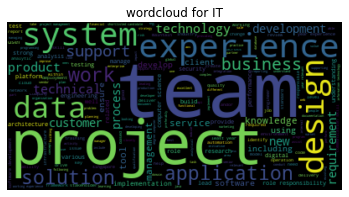

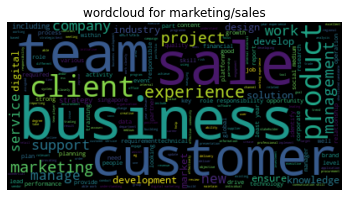

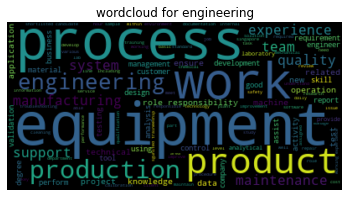

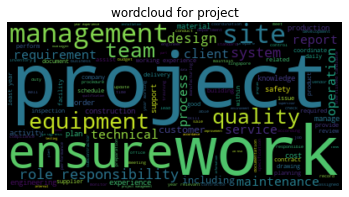

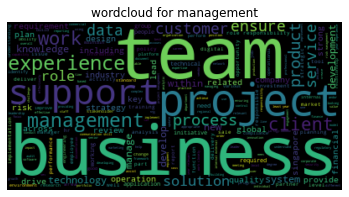

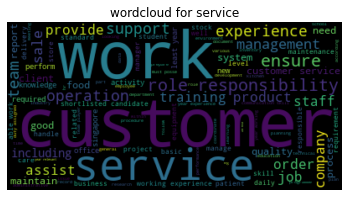

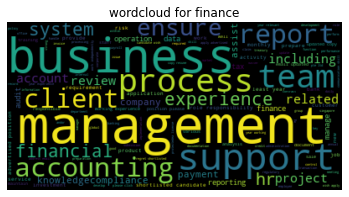

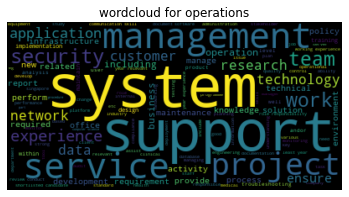

In [ ]:
from wordcloud import WordCloud

for col in job_roles_df.columns[1:]:
  ones = (np.where(job_roles_df.loc[:,col]>0.2,1,0)==1)
  one_indices = job_roles_df.loc[:,col][ones].index

  wordcloud_txt = ' '.join(cleaned_description2[one_indices].values)
  wordcloud = WordCloud().generate(wordcloud_txt)

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title ("wordcloud for {}".format(col))
  plt.axis("off")
  plt.show()